#### Module 3: Introduction to Machine Learning with Python

Dataset used: Prisoners dataset sourced from data.gov.in

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/home/pydev/workflow/dt_learn_data_science/edureka/Python_Machine_Learning/ Python_ML_Training_AD/Introduction Machine Learning/prisoners.csv')

1. Data Loading:

a. Load the dataset “prisoners.csv” using pandas and display the first and last five rows in the dataset.

In [27]:
# 1. Data Loading:
# a. Load the dataset “prisoners.csv” using pandas and display the first and
# last five rows in the dataset.
# [Hint: Refer to read_csv, head and tail methods in pandas]

# show the first row
# df.iloc[:1 ,]
df.head(1)

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170


In [28]:
# show the lasts 5 rows
df.tail(5)

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


b. Use describe method in pandas and find out the number of columns. Can you say something about those rows who have zero inmates?

In [29]:
# b. Use describe method in pandas and find out the number of columns. Can
# you say something about those rows who have zero inmates?
# [Hint: Use the loc attribute of dataframe combined with conditional
# checks]
# df.info()
# df.isnull().sum()
print("Number of Columns: ", df.shape[1])

Number of Columns:  6


In [30]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  STATE/UT  is :  0
Count of zeros in column  YEAR  is :  0
Count of zeros in column  No. of Inmates benefitted by Elementary Education  is :  10
Count of zeros in column  No. of Inmates benefitted by Adult Education  is :  9
Count of zeros in column  No. of Inmates benefitted by Higher Education  is :  9
Count of zeros in column  No. of Inmates benefitted by Computer Course  is :  13


2. Data Manipulation:


a. Create a new column -’total_benefitted’ that is a sum of inmates enefitted through all modes. 

In [31]:
# a. Create a new column -total_benefitted that is a sum of inmates
# benefitted through all modes.
# [Hint: Use sum method with appropriate axis]
df["total_benefitted"] = df.iloc[:, 2:6].sum(axis=1)

b. Create a new row - “totals” that is the sum of all inmates benefitted
through each mode across all states

In [32]:
df["totals"] = df[['No. of Inmates benefitted by Elementary Education',
                   'No. of Inmates benefitted by Adult Education',
                   'No. of Inmates benefitted by Higher Education',
                   'No. of Inmates benefitted by Computer Course']].agg('sum', axis=1)

df.head(5)

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted,totals
0,Andhra Pradesh,2013,9480,13758,672,170,24080,24080
1,Arunachal Pradesh,2013,0,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470,1470
3,Bihar,2013,1693,3013,125,1417,6248,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762,3762


3. Plotting:

a. Make a bar plot with each state name on the x -axis and their total
benefitted inmates as their bar heights. Which state has the maximum
number of beneficiaries?

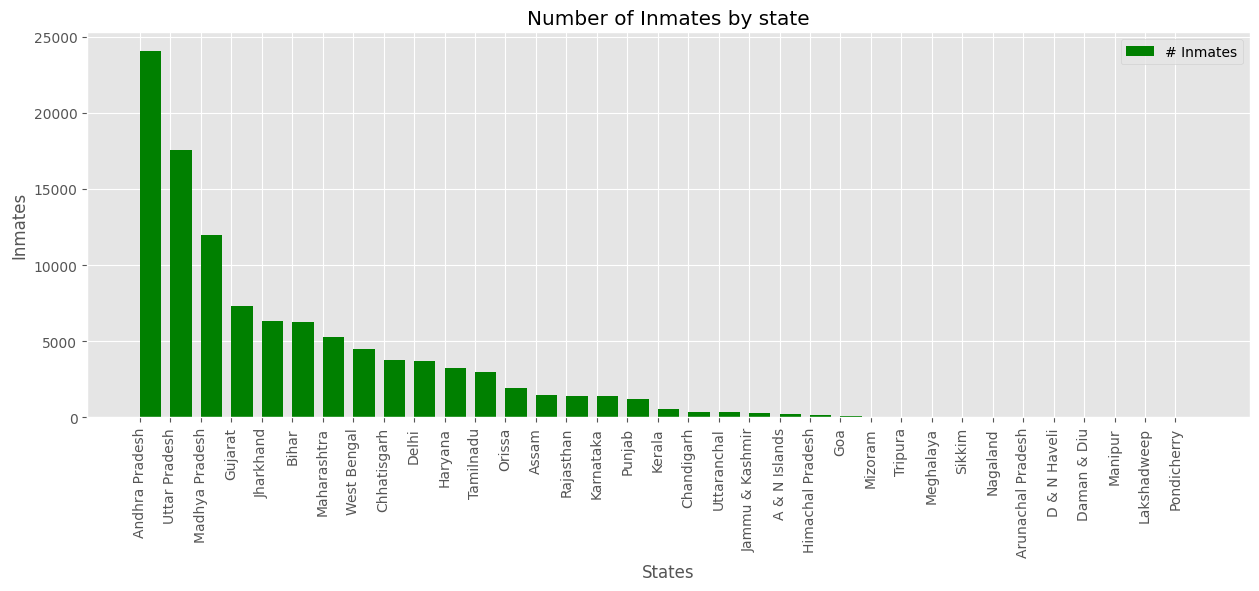

In [33]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 5))
df.sort_values('totals', inplace=True, ascending=False)
plt.bar(df["STATE/UT"], df["totals"], align='edge', color='green', label="# Inmates", width=.7)
plt.ylabel("Inmates")
plt.xlabel("States")
plt.title("Number of Inmates by state")
plt.ylim = 1.0
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

Which state has the maximum number of beneficiaries?

In [34]:
# Andhra Pradesh

b. Make a pie chart that depicts the ratio among different modes of
benefits

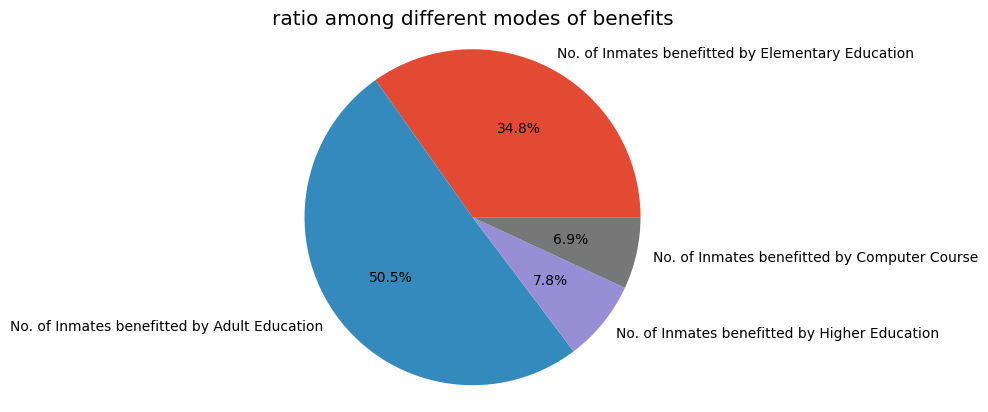

In [35]:

df_d = df[['No. of Inmates benefitted by Elementary Education',
                   'No. of Inmates benefitted by Adult Education',
                   'No. of Inmates benefitted by Higher Education',
                   'No. of Inmates benefitted by Computer Course']].sum()
df_new = pd.DataFrame({'benefits':df_d.index, 'summ':df_d.values})

fig, ax = plt.subplots()
ax.pie(df_new.summ, labels=df_new.benefits, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('ratio among different modes of benefits')
plt.show()